In [1]:
from astropy.table import Table
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt


import matplotlib as mpl
mpl.rcParams['axes.labelsize']= 22
mpl.rcParams['legend.fontsize']= 15
mpl.rcParams['xtick.major.size']= 16
mpl.rcParams['xtick.minor.size']= 8
mpl.rcParams['ytick.major.size']= 16
mpl.rcParams['ytick.minor.size']= 8
mpl.rcParams['xtick.labelsize']= 16
mpl.rcParams['ytick.labelsize']= 16

# Functions and dictionary

In [2]:
Bands=['u','J0378','J0395','J0410','J0430','g','J0515','r','J0660','i','J0861','z'] 
cent_lambd={'u':3536,'J0378':3770,'J0395':3940,'J0410':4094,'J0430':4292, 'g':4751,
            'J0515':5133, 'r':6258, 'J0660':6614,   'i':7690 ,'J0861':8611, 'z':8831}
lamd=[3536,3770,3940,4094,4292,4751,5133,6258,6614,7690,8611,8831]
def flux_2_mJy (mag, mag_err):
    """
    This function convert magnitudes AB to microJy
    """
    fl = 10**9.56*10**(-mag/2.5) 
    fl_e = mag_err*fl/(2.5*np.log10(np.exp(1)))
    return fl, fl_e


def mJy_2_ergs_A(flux, band):
    """
    This fucntion convert flux in microJy to ergs/cm^2/s/A
    """
    fluxout = (flux*1e-6*u.Jy).to(u.erg / u.cm**2 / u.s / u.AA,  equivalencies=u.spectral_density(cent_lambd[band] * u.AA))
    return fluxout

# Converting mag to flux

In [4]:
## Reading the S-SPLUS table
tab_samp=Table.read('result.csv') 
tab_samp

ID,RA,DEC,u_aper_3,e_u_aper_3,SEX_FLAGS_u,J0378_aper_3,e_J0378_aper_3,SEX_FLAGS_J0378,J0395_aper_3,e_J0395_aper_3,SEX_FLAGS_J0395,J0410_aper_3,e_J0410_aper_3,SEX_FLAGS_J0410,J0430_aper_3,e_J0430_aper_3,SEX_FLAGS_J0430,g_aper_3,e_g_aper_3,SEX_FLAGS_g,J0515_aper_3,e_J0515_aper_3,SEX_FLAGS_J0515,r_aper_3,e_r_aper_3,SEX_FLAGS_r,J0660_aper_3,e_J0660_aper_3,SEX_FLAGS_J0660,i_aper_3,e_i_aper_3,SEX_FLAGS_i,J0861_aper_3,e_J0861_aper_3,SEX_FLAGS_J0861,z_aper_3,e_z_aper_3,SEX_FLAGS_z,zml,odds
str28,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64
iDR4_3_STRIPE82-0073_0011797,51.409848615613164,-1.030173921067484,20.403944,0.06425557,3,19.943937,0.068811394,3,19.908535,0.09611419,3,19.653507,0.073767975,3,19.316114,0.05483402,3,19.188086,0.02087266,3,18.933308,0.036816433,3,18.515003,0.014106299,3,18.435844,0.015856009,3,18.156784,0.013276707,3,17.99891,0.024285989,3,17.917828,0.0173032,3,0.025,0.99253684
iDR4_3_STRIPE82-0073_0039893,51.31772056272655,-0.4090053132530125,19.764612,0.04764287,2,19.064596,0.044755906,2,19.169403,0.059922725,2,18.639713,0.0370782,2,18.127634,0.026043499,2,17.512848,0.008120738,2,17.142626,0.013103564,2,16.521978,0.0046539255,2,16.34915,0.004939146,2,15.934047,0.0035803386,2,15.655785,0.0067245113,2,15.558397,0.0036824422,2,0.035,0.9942637
iDR4_3_STRIPE82-0065_0035625,45.96018311222881,-0.20440927514360968,20.247591,0.062185876,0,19.715872,0.06400516,0,19.470695,0.07480055,0,19.18866,0.05374807,0,18.855822,0.040589787,0,18.435987,0.016327655,0,18.113188,0.02175533,0,17.58328,0.009985609,0,17.472483,0.0087052835,0,17.137787,0.0070448224,0,16.865414,0.011184369,0,16.836376,0.0082395915,0,0.031166667,0.9955521
iDR4_3_STRIPE82-0116_0005442,319.91974782114994,0.12091657310005992,20.658936,0.09510668,2,19.895092,0.0875723,2,19.634146,0.15348157,2,19.338615,0.081769615,2,18.961521,0.056570556,2,18.428885,0.0139141595,2,18.050442,0.023473868,2,17.406578,0.0078007,2,17.269436,0.008436722,2,16.81837,0.006321947,2,16.564232,0.009846207,2,16.443214,0.0069993036,2,0.036666665,0.99444187
iDR4_3_STRIPE82-0074_0009433,50.696713471161,0.14944045148719903,20.672977,0.041181937,3,20.048124,0.04113917,3,20.07993,0.0643501,3,19.43061,0.033318393,3,19.06422,0.02326955,3,18.527475,0.0063121207,3,18.17596,0.011248988,3,17.531694,0.0036042463,3,17.378845,0.0039858855,3,16.997503,0.0030529525,3,16.800167,0.0053030225,3,16.683466,0.0034885712,3,0.022333333,0.99603456
iDR4_3_STRIPE82-0072_0024325,49.92934767645183,0.565332637427566,18.578915,0.020330805,0,18.068708,0.022308555,0,18.010733,0.030201588,0,17.860956,0.023867521,0,17.712048,0.020499928,0,17.588755,0.008435919,0,17.365562,0.0146707045,0,16.97279,0.0057014385,0,17.068884,0.0071516926,0,16.761742,0.0054660896,0,16.653362,0.009535041,0,16.529095,0.006380551,0,0.020083332,0.9977137
iDR4_3_STRIPE82-0067_0011186,46.294175467397324,-1.0754229286517034,19.81378,0.03841047,3,19.410242,0.044660203,3,19.224352,0.05537536,3,19.042244,0.045815106,3,18.513386,0.031562142,3,17.87997,0.00956996,3,17.43919,0.014818399,3,16.858791,0.005364814,3,16.796192,0.006159785,3,16.408134,0.0047412533,3,16.199205,0.00740253,3,16.122768,0.005298831,3,0.059166666,0.9744264
iDR4_3_STRIPE82-0071_0009531,50.17886124634887,-1.1086109356180576,19.917738,0.045935046,3,19.409184,0.048404053,3,19.19638,0.059317704,3,18.942728,0.045993164,3,18.916866,0.052221883,3,18.508602,0.014100018,3,18.332155,0.026082886,3,17.731785,0.008915975,3,17.662361,0.012289652,3,17.35029,0.007851312,3,17.244402,0.014279008,3,17.127712,0.009651645,3,0.021416666,0.9976724
iDR4_3_STRIPE82-0071_0037955,50.13832526469342,-0.3400273604468456,19.382936,0.040870063,3,18.891077,0.035980985,3,18.514004,0.03913025,3,18.289005,0.030525498,3,18.155552,0.033310454,3,17.402973,0.0077398047,3,17.176855,0.0135

In [12]:
fl = []
fl_err = []
ID_num = 0
for band in Bands:
    mag = '{}_aper_3'.format(band)
    mag_e = 'e_{}_aper_3'.format(band)
    
    fl_temp, fl_err_temp = flux_2_mJy(tab_samp[ID_num][mag], 
                                      tab_samp[ID_num][mag_e])
    
    fl.append(fl_temp)
    fl_err.append(fl_err_temp)

# Comparing SDSS spectrum with magnitudes in apertures of 3 arcsec 

In [16]:
fl_ergs_A = []
fl_ergs_A_err = []
ID_num = 0
for i, band in enumerate(Bands):
    
    fl_temp = mJy_2_ergs_A(fl[i], band)
    fl_temp_err = mJy_2_ergs_A(fl_err[i], band)
    
    fl_ergs_A.append(fl_temp.value)
    fl_ergs_A_err.append(fl_temp_err.value)
    
fl_ergs_A = np.array(fl_ergs_A)
fl_ergs_A_err = np.array(fl_ergs_A_err)    

print(fl_ergs_Aergs_A)

[6.00093041e-17 8.06423551e-17 7.62806279e-17 8.93556928e-17
 1.10931702e-16 1.01862948e-16 1.10345588e-16 1.09131063e-16
 1.05088386e-16 1.00520450e-16 9.27148979e-17 9.49882165e-17]


In [17]:
## Loading SDSS spectrum
spec = Table.read('format_spec.csv')
print(spec['Flux'])

 Flux 
------
17.689
 13.17
 8.652
 8.128
11.072
 7.129
15.442
22.739
20.657
14.734
   ...
13.118
12.891
12.693
  11.5
 9.507
 11.87
10.662
11.318
12.007
 12.34
11.897
Length = 3843 rows


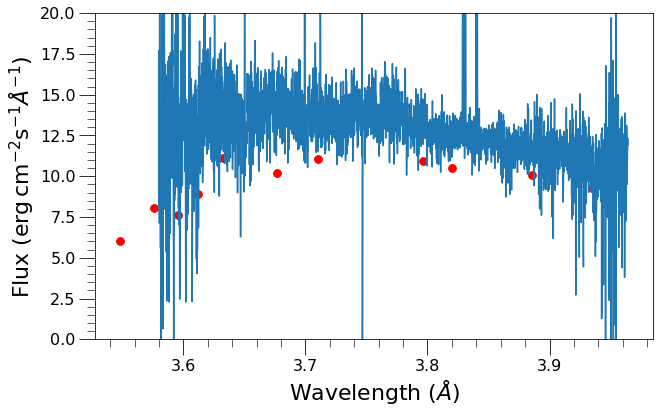

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(np.log10(lamd), fl_ergs_A*1e17, c='red', s=60)
plt.plot(np.log10(spec['Wavelength']), spec['Flux'])


plt.ylim(0, 20)
plt.ylabel('Flux (erg$\,$cm$^{-2}$s$^{-1}$$\\AA^{-1}$)')
plt.xlabel('Wavelength ($\\AA$)')
plt.minorticks_on()